In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dnd-stats/stats.csv


In [2]:
df = pd.read_csv('/kaggle/input/dnd-stats/stats.csv')
df.describe()

,height,weight,speed,strength,dexterity,constitution,intelligence,wisdom,charisma
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,59.597500,146.863500,28.324500,12.85130,12.838400,12.752800,12.752900,12.41650,12.870100
std,13.283107,68.304729,2.360245,2.96494,2.945531,2.924953,2.947119,2.89283,2.974746
min,33.000000,39.000000,25.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000
25%,52.000000,120.000000,25.000000,11.00000,11.000000,11.000000,11.000000,10.00000,11.000000
50%,64.000000,154.000000,30.000000,13.00000,13.000000,13.000000,13.000000,13.00000,13.000000
75%,69.000000,188.000000,30.000000,15.00000,15.000000,15.000000,15.000000,15.00000,15.000000
max,82.000000,367.000000,30.000000,20.00000,20.000000,20.000000,20.000000,19.00000,20.000000


In [3]:
df.race.value_counts(normalize=True)

dragonborn    0.1144
halfling      0.1135
gnome         0.1121
human         0.1120
tiefling      0.1120
elf           0.1112
dwarf         0.1095
half.elf      0.1086
half.orc      0.1067
Name: race, dtype: float64

The target distribution is pretty balanced. The baseline model that simply predicts the most common class would achieve an accuracy of 11.44%. 

In [4]:
def grouped_boxplot(x, group, data):
    sorted_index = df.groupby(group)[x].median().sort_values(ascending=False).index
    return sns.boxplot(y=group, x=x, data=data, order=sorted_index)

In [5]:
y = df.race
X = df.drop(columns='race')

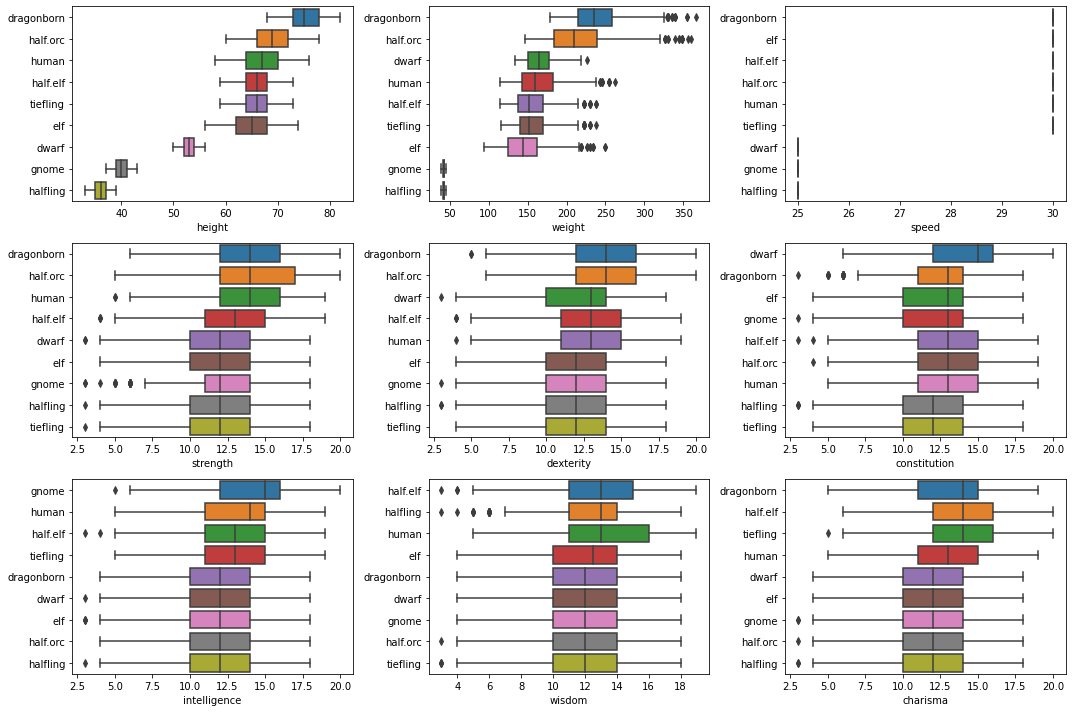

In [6]:
nsubplots = X.shape[1] # one subplot for each predictor
ncols = round(nsubplots**0.5)
nrows = (nsubplots // ncols) + (nsubplots % ncols)
position = range(1, nsubplots + 1)

fig = plt.figure(figsize=(15, 10))
for i in range(nsubplots):
    ax = fig.add_subplot(nrows, ncols, position[i])
    ax = grouped_boxplot(X.columns[i], 'race', df)
    ax.set(ylabel=None)
fig.tight_layout()
plt.show()

Height, weight, and speed appear to be the most informative predictors.

Let's check for pairwise correlations among the predictors. 

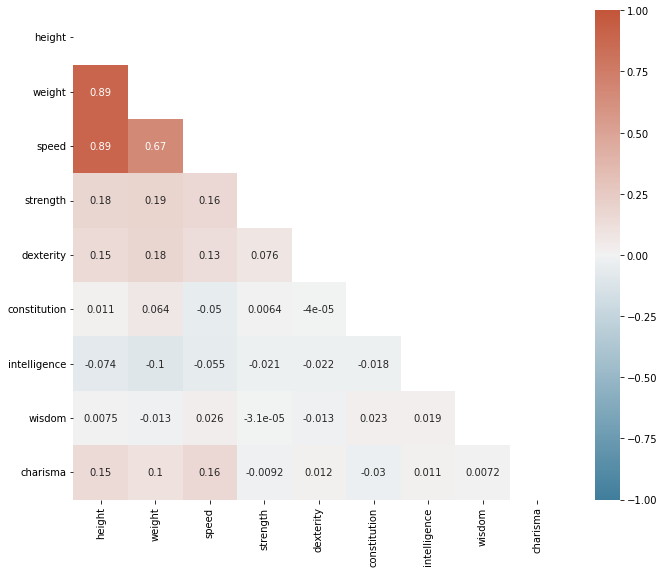

In [7]:
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0, vmin=-1, vmax=1)
plt.show()

Heigh, weight, and speed are strongly positively correlated with each other.